<p align="center"><font size="6">Landing Club Case Study - Unlocking Insights in Loan Defaults</font></p>
<p align="center">By Deepak Sivaraman and Ravi Singh</p>


<details>
<summary>Introduction</summary>

- In this case study, we delve into the world of banking and financial services, using Exploratory Data Analysis (EDA) to tackle real-world challenges.

</details>

<details>
<summary>Business</summary>

- We find ourselves at the heart of a critical issue in urban lending.
- Our challenge is to strike a balance between two pivotal risks in the loan approval process:
  - Lost Business Opportunity: Refusing loans to capable applicants results in missed revenue.
  - Default Risk: Approving loans to potential defaulters can lead to substantial financial losses.

</details>

<details>
<summary>Objectives</summary>

- Our ultimate aim is to provide actionable insights for risk management, reducing loan defaults, and bolstering financial stability.
- By analyzing past loan data, we intend to uncover the key factors driving loan defaults, aiding in portfolio management and risk assessment.

</details>




<details>
  <summary>Data Sourcing</summary>
  
  **Import Libraries:**
  - Import necessary Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn for data analysis and visualization.

  **Read Data:**
  - Read the loan dataset from a CSV file and convert it into a DataFrame.
  - Check the shape of the DataFrame.
</details>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Read the .csv file , convert into DataFrame & check the shape
loan=pd.read_csv('loan.csv',low_memory=False)
Df_loan=pd.DataFrame(loan)
Df_loan.shape

(39717, 112)

In [6]:
#Find the number of columns which has all the value as NA
print("Number of columns with all values as NA:", Df_loan.columns[Df_loan.isna().all()].shape[0])

Number of columns with all values as NA: 54


 <details>
  <summary>Data Cleaning</summary>
  
  **Identify Columns with All Null Values:**
  - Find the number of columns that have all values as NA (null values).

  **Drop Columns with All Null Values:**
  - Drop the columns with all values as NA from the DataFrame.

  **Select Relevant Columns:**
  - Create a list of columns to drop, including those with single values or unnecessary for analysis.
  - Remove the specified columns from the DataFrame.

  **Filter by Loan Status:**
  - Filter out records that are still in progress ("Current") as the analysis focuses on defaulted loans.
  - Retain records with a "Fully Charged" status if needed.

  **Handle Missing Values:**
  - Replace missing values in the "emp_length" column with the mode (most common value).
  - Convert and clean the "emp_length" values to numeric format.

  **Convert Categorical Columns:**
  - Convert the "term" column to numeric representation by removing " months" and converting to integers.
  - Clean and convert "revol_util" and "int_rate" columns to numeric values.
  - Round selected columns to two decimal places.

  **Date Processing:**
  - Create new date-related columns from the "issue_d" column, including "issued_date," "issued_year," and "issued_month."

  **Descriptive Statistics:**
  - Generate descriptive statistics for the "loan_amnt" column to understand its distribution.

  **Create Categorical Groups:**
  - Create categorical groups for columns like "loan_amnt," "annual_inc," "installment," "revol_util," and "int_rate" based on quantiles.

  **Handle Home Ownership:**
  - Remove rows with "home_ownership" as "NONE" since they are negligible in number and have minimal impact.

  **Handle Outliers:**
  - Identify and remove outliers in the "annual_inc" column by filtering records below the 99th percentile value.

  **Analyzing Charged Off Loans:**
  - Create a new DataFrame, "Df_loan_ChargedOff," to isolate charged-off loans for further analysis.

  **Loan Status Distribution:**
  - Calculate and visualize the distribution of loan statuses, showing the percentage of fully paid, charged off, and current loans.

  **Verification Status Analysis:**
  - Analyze charged-off loans by verification status, displaying the count and percentage of each verification status category.
  </details>


In [7]:
#Drop all the columns which has all the values as NA
Df_loan.dropna(axis=1, how='all', inplace=True)
print("DataFrame shape after dropping:", Df_loan.shape)

DataFrame shape after dropping: (39717, 58)


In [8]:
# Columns to drop: These columns are either have single values or the values which is not required for my analysis
columns_to_drop = ['id', 'member_id', 'url', 'desc', 'title', 'acc_now_delinq', 'delinq_amnt', 'chargeoff_within_12_mths',
                   'tax_liens', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status',
                   'pymnt_plan', 'out_prncp', 'out_prncp_inv','earliest_cr_line','last_pymnt_d','last_credit_pull_d',
                   'mths_since_last_delinq','mths_since_last_record','next_pymnt_d','pub_rec_bankruptcies','emp_title',
                   'funded_amnt','delinq_2yrs','inq_last_6mths','open_acc','revol_bal','total_acc',
                   'initial_list_status','out_prncp','out_prncp_inv','total_rec_prncp',
                   'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
                   'next_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','total_pymnt','funded_amnt_inv']
Df_loan = Df_loan.drop(columns=columns_to_drop, axis=1)
print("DataFrame shape after dropping specified columns:",Df_loan.shape)

DataFrame shape after dropping specified columns: (39717, 20)


In [9]:
#Filter out the records which are in Progress as we need to evaluate only the ones which have defaulted. 
#Keeping the Fully Charged records if any analysis is needed
Df_loan = Df_loan[Df_loan.loan_status != "Current"]
Df_loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [10]:
# Checking for Missing values
(Df_loan.isna().sum()/len(Df_loan.index))*100

loan_amnt                        0.000000
term                             0.000000
int_rate                         0.000000
installment                      0.000000
grade                            0.000000
sub_grade                        0.000000
emp_length                       2.677761
home_ownership                   0.000000
annual_inc                       0.000000
verification_status_Formatted    0.000000
verification_status              0.000000
issue_d                          0.000000
loan_status                      0.000000
purpose                          0.000000
zip_code                         0.000000
addr_state                       0.000000
dti                              0.000000
pub_rec                          0.000000
revol_util                       0.129611
total_pymnt_inv                  0.000000
dtype: float64

In [11]:
#Handle Nulls and convert the emp_length column values

#Replace the NULL values with largest value which is 10 years 
Df_loan.emp_length.fillna(Df_loan.emp_length.mode()[0], inplace = True)
Df_loan.emp_length.isna().sum()

#Convert the value to float by cleaning the data of text information
Df_loan.emp_length = pd.to_numeric(Df_loan.emp_length.apply(lambda x : 0 if str(x)=='< 1 year' else str(x).replace('+', '').split(' ')[0]))

In [12]:
# Convert 'term' column to numerical representation by removing ' months' and converting the values to integers
Df_loan.term = pd.to_numeric(Df_loan.term.apply(lambda x : str(x).replace(' months', '')))
Df_loan.term.value_counts()

36    29096
60     9481
Name: term, dtype: int64

In [13]:
#Drop Null values from revol_util and also clean up the data where we replace the % sign
Df_loan.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
Df_loan.revol_util.isna().sum()
Df_loan.revol_util = pd.to_numeric(Df_loan.revol_util.apply(lambda x : str(x).split('%')[0]))

In [14]:
#Drop Null values from revol_util and also clean up the data where we replace the % sign
Df_loan.dropna(axis = 0, subset = ['int_rate'] , inplace = True)
Df_loan.int_rate.isna().sum()
Df_loan.int_rate = pd.to_numeric(Df_loan.int_rate.apply(lambda x : str(x).split('%')[0]))

In [15]:
# Round the selected columns to 2 decimal places
Df_loan[['installment','int_rate','annual_inc','dti']] = Df_loan[[ 
'installment','int_rate','annual_inc','dti']].round(decimals=2)

In [16]:
# Summary: This code processes a DataFrame 'Df_loan' to extract and format date-related information.
# It creates new columns for 'issued_date', 'issued_year', and 'issued_month' from the 'issue_d' column.

Df_loan["issued_date_formatted"] = Df_loan.issue_d.apply(lambda x : str(x) if len(str(x))==6 else '0'+ str(x))
Df_loan["issued_date"]=pd.to_datetime(Df_loan.issued_date_formatted.str.upper(), format='%y-%b', yearfirst=True)#pd.to_datetime(Df_loan.issue_d)
Df_loan["issued_year"]=pd.to_datetime(Df_loan.issued_date).dt.year
Df_loan["issued_month"]=pd.to_datetime(Df_loan.issued_date).dt.month
Df_loan.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status_Formatted,...,zip_code,addr_state,dti,pub_rec,revol_util,total_pymnt_inv,issued_date_formatted,issued_date,issued_year,issued_month
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Source Verified,...,860xx,AZ,27.65,0,83.7,5833.84,11-Dec,2011-12-01,2011,12
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,...,309xx,GA,1.00,0,9.4,1008.71,11-Dec,2011-12-01,2011,12
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,...,606xx,IL,8.72,0,98.5,3005.67,11-Dec,2011-12-01,2011,12
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,...,917xx,CA,20.00,0,21.0,12231.89,11-Dec,2011-12-01,2011,12
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,...,852xx,AZ,11.20,0,28.3,5632.21,11-Dec,2011-12-01,2011,12


In [17]:
# Summary: Generate descriptive statistics for the 'loan_amnt' column in the DataFrame 'Df_loan'
# to gain insights into its distribution, including count, mean, standard deviation, minimum, 
# 25th percentile, median (50th percentile), 75th percentile, and maximum values.
Df_loan.loan_amnt.describe()

count    38527.000000
mean     11055.265139
std       7348.433587
min        500.000000
25%       5325.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [18]:
# Summary: This code creates a new categorical column 'loan_amt_groups' by dividing the 'loan_amnt' column
# into five quantile-based groups using pandas' qcut function, providing a summary view of loan amount distribution.
# It then displays the first few rows of the updated DataFrame.


Df_loan['loan_amt_groups'] = pd.qcut(Df_loan['loan_amnt'], q=5)
Df_loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status_Formatted,...,addr_state,dti,pub_rec,revol_util,total_pymnt_inv,issued_date_formatted,issued_date,issued_year,issued_month,loan_amt_groups
0,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Source Verified,...,AZ,27.65,0,83.7,5833.84,11-Dec,2011-12-01,2011,12,"(499.999, 5000.0]"
1,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,...,GA,1.00,0,9.4,1008.71,11-Dec,2011-12-01,2011,12,"(499.999, 5000.0]"
2,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,...,IL,8.72,0,98.5,3005.67,11-Dec,2011-12-01,2011,12,"(499.999, 5000.0]"
3,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,...,CA,20.00,0,21.0,12231.89,11-Dec,2011-12-01,2011,12,"(7750.0, 11200.0]"
5,5000,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,...,AZ,11.20,0,28.3,5632.21,11-Dec,2011-12-01,2011,12,"(499.999, 5000.0]"


In [19]:
# Summary: This code creates income bins by dividing the 'annual_inc' column into 5 equal-sized groups (quantiles).
# It allows for a better understanding of income distribution within the loan dataset.
Df_loan['annual_inc_groups'] = pd.qcut(Df_loan['annual_inc'], q=5)

In [20]:
Df_loan['installment_groups'] = pd.qcut(Df_loan['installment'], q=5)

In [21]:
#Create Income Bins. Considered the difference between Max and Min value and divided by 5 to create 5 bins
Df_loan['rv_util_groups'] = pd.qcut(Df_loan['revol_util'], q=5,precision =0)

In [22]:
Df_loan['interest_rate_groups'] = pd.qcut(Df_loan['int_rate'], q=5)

In [23]:
#checking unique values and NULLS for home_ownership
print(Df_loan.home_ownership.isna().sum())
print(Df_loan.home_ownership.value_counts())

0
RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          96
NONE            3
Name: home_ownership, dtype: int64


In [24]:
#Ignore the rows with Home Ownership as None as it very less in numbers and can be omitted without having any impact
Df_loan = Df_loan[Df_loan['home_ownership']!='NONE']
print(Df_loan.home_ownership.value_counts())

RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          96
Name: home_ownership, dtype: int64


Identify the outliers for anuual income

count    3.852400e+04
mean     6.880830e+04
std      6.421626e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


<Axes: >

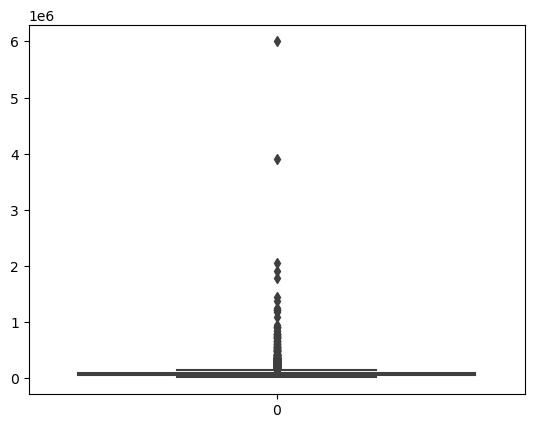

In [25]:
#Check for outliers in annual_inc 
print(Df_loan['annual_inc'].describe())
sns.boxplot(Df_loan['annual_inc'])

In [26]:
#The above box plot is too bunched up which means we have some outliers 

#Checking the different quarantiles to pick the safe number to filter the data with
print(Df_loan.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99, 1]))

0.50      59000.0
0.75      82000.0
0.90     115000.0
0.95     140004.0
0.97     165000.0
0.98     187000.0
0.99     234000.0
1.00    6000000.0
Name: annual_inc, dtype: float64


count     38135.000000
mean      65331.667574
std       35104.379775
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80300.000000
max      233004.000000
Name: annual_inc, dtype: float64


<Axes: >

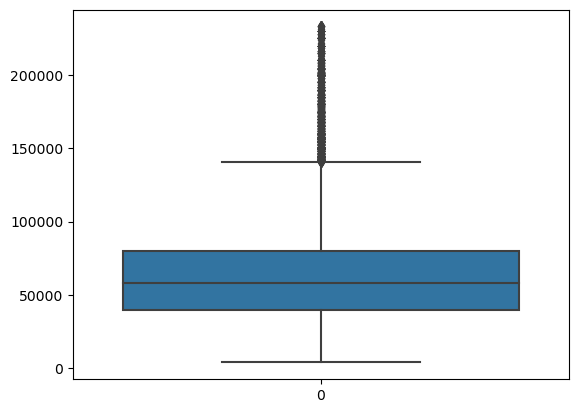

In [27]:
#Considering the 99 percentile value and filtering data using that value
#Remove the records which are greater than 99 percentile
Df_loan = Df_loan[Df_loan.annual_inc<Df_loan['annual_inc'].quantile(0.99)]
print(Df_loan.annual_inc.describe())
sns.boxplot(Df_loan['annual_inc'])

In [28]:
# Filter the DataFrame to create a new DataFrame containing only charged off loans
Df_loan_ChargedOff=Df_loan[Df_loan['loan_status']=='Charged Off']

In [29]:
#From all the loan data, find the % of Fully Paid, Charged Off & current loan
(Df_loan['loan_status'].value_counts() / len(Df_loan) * 100).round(2)

Fully Paid     85.4
Charged Off    14.6
Name: loan_status, dtype: float64

**Verification Status**
- We can observed that only 14.17% loan has been charged off

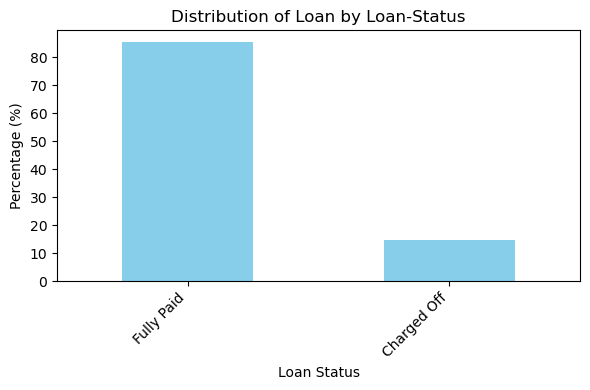

In [30]:
# Summary: This code calculates and visualizes the distribution of loan statuses in the DataFrame 'Df_loan'.
# It calculates the percentage of each loan status category and displays the results using a bar plot.
# It also sets appropriate labels and formatting for better visualization.

loan_status_percentage = (Df_loan['loan_status'].value_counts() / len(Df_loan) * 100).round(2)
plt.figure(figsize=(6, 4))
plt.title('Distribution of Loan by Loan-Status')
plt.xlabel('Loan Status')
plt.ylabel('Percentage (%)')
ax = loan_status_percentage.plot(kind='bar', color='skyblue')
ax.set_xticklabels(loan_status_percentage.index, rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [31]:
#All the loan records distribution based on verification_status
DF_Ver_Status= Df_loan_ChargedOff.groupby('verification_status').size().reset_index(name='verification_status_Count').sort_values(by='verification_status_Count', ascending=False)

DF_Ver_Status['perc_value'] = 100 * DF_Ver_Status.verification_status_Count / DF_Ver_Status.verification_status_Count.sum()
DF_Ver_Status.head()

,verification_status,verification_status_Count,perc_value
0,Not Verified,2123,38.128592
2,Verified,2026,36.386494
1,Source Verified,1419,25.484914


## Univariate Analysis ##

**Verification Status** 
- We can clearly observe that borrowers whose sources of income are not fully verified tend to be more likely to fall into the category of defaulters with 16.86%.


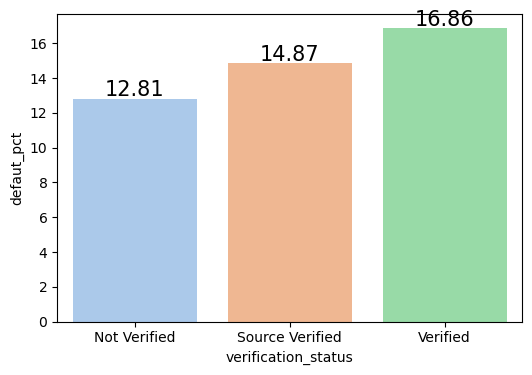

In [32]:
# Summary: This code analyzes loan data, specifically focusing on 'Charged Off' and 'Fully Paid' loans,
# to calculate the default percentage for different verification statuses and visualize the results using a bar plot

DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('verification_status').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('verification_status').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)
merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='verification_status')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100

merged_df = merged_df.sort_values('defaut_pct')


plt.figure(figsize=(6,4))
plots = sns.barplot(data =merged_df,x='verification_status', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')

plt.show()

**Loan Term Length:** 
- Loans with a 60-month term exhibit the highest default rates with 25.41%.


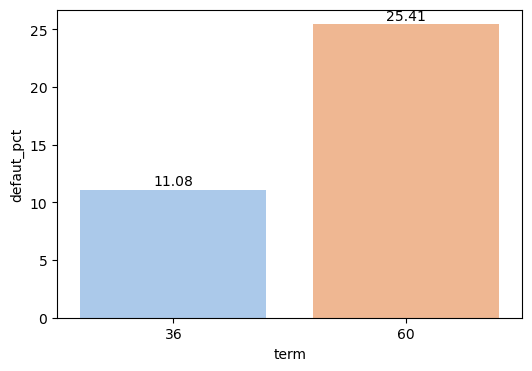

In [33]:
# Summary: This code analyzes loan data, specifically focusing on 'Charged Off' and 'Fully Paid' loans,
# grouped by 'term' (loan term length), to calculate the default percentage for each term length
# and visualize the results using a bar plot.

DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('term').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('term').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)

merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='term')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100

merged_df = merged_df.sort_values('defaut_pct')


plt.figure(figsize=(6,4))
plots = sns.barplot(data =merged_df,x='term', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:
     plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')

plt.xticks(rotation=360)
plt.show()

**Employment Length:** 
- We can clearly observe that employment with 10+ years has a higher number of defaults.


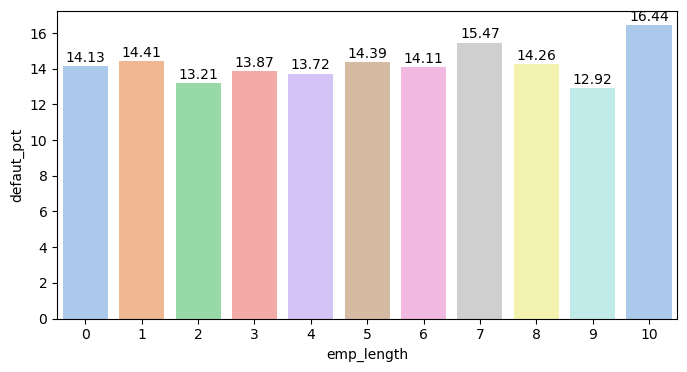

In [34]:
# Summary: This code analyzes loan data, specifically focusing on 'Charged Off' and 'Fully Paid' loans,
# grouped by employment length ('emp_length'), to calculate the default percentage for different employment lengths
# and visualize the results using a bar plot.

DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('emp_length').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('emp_length').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)


merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='emp_length')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100

merged_df = merged_df.sort_values('defaut_pct')


plt.figure(figsize=(8,4))
plots = sns.barplot(data =merged_df,x='emp_length', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')

plt.xticks(rotation=360)
plt.show()

**Borrower's State Address**: 
- We can observe that certain states, such as NE and NV, experience the highest number of loan defaults.

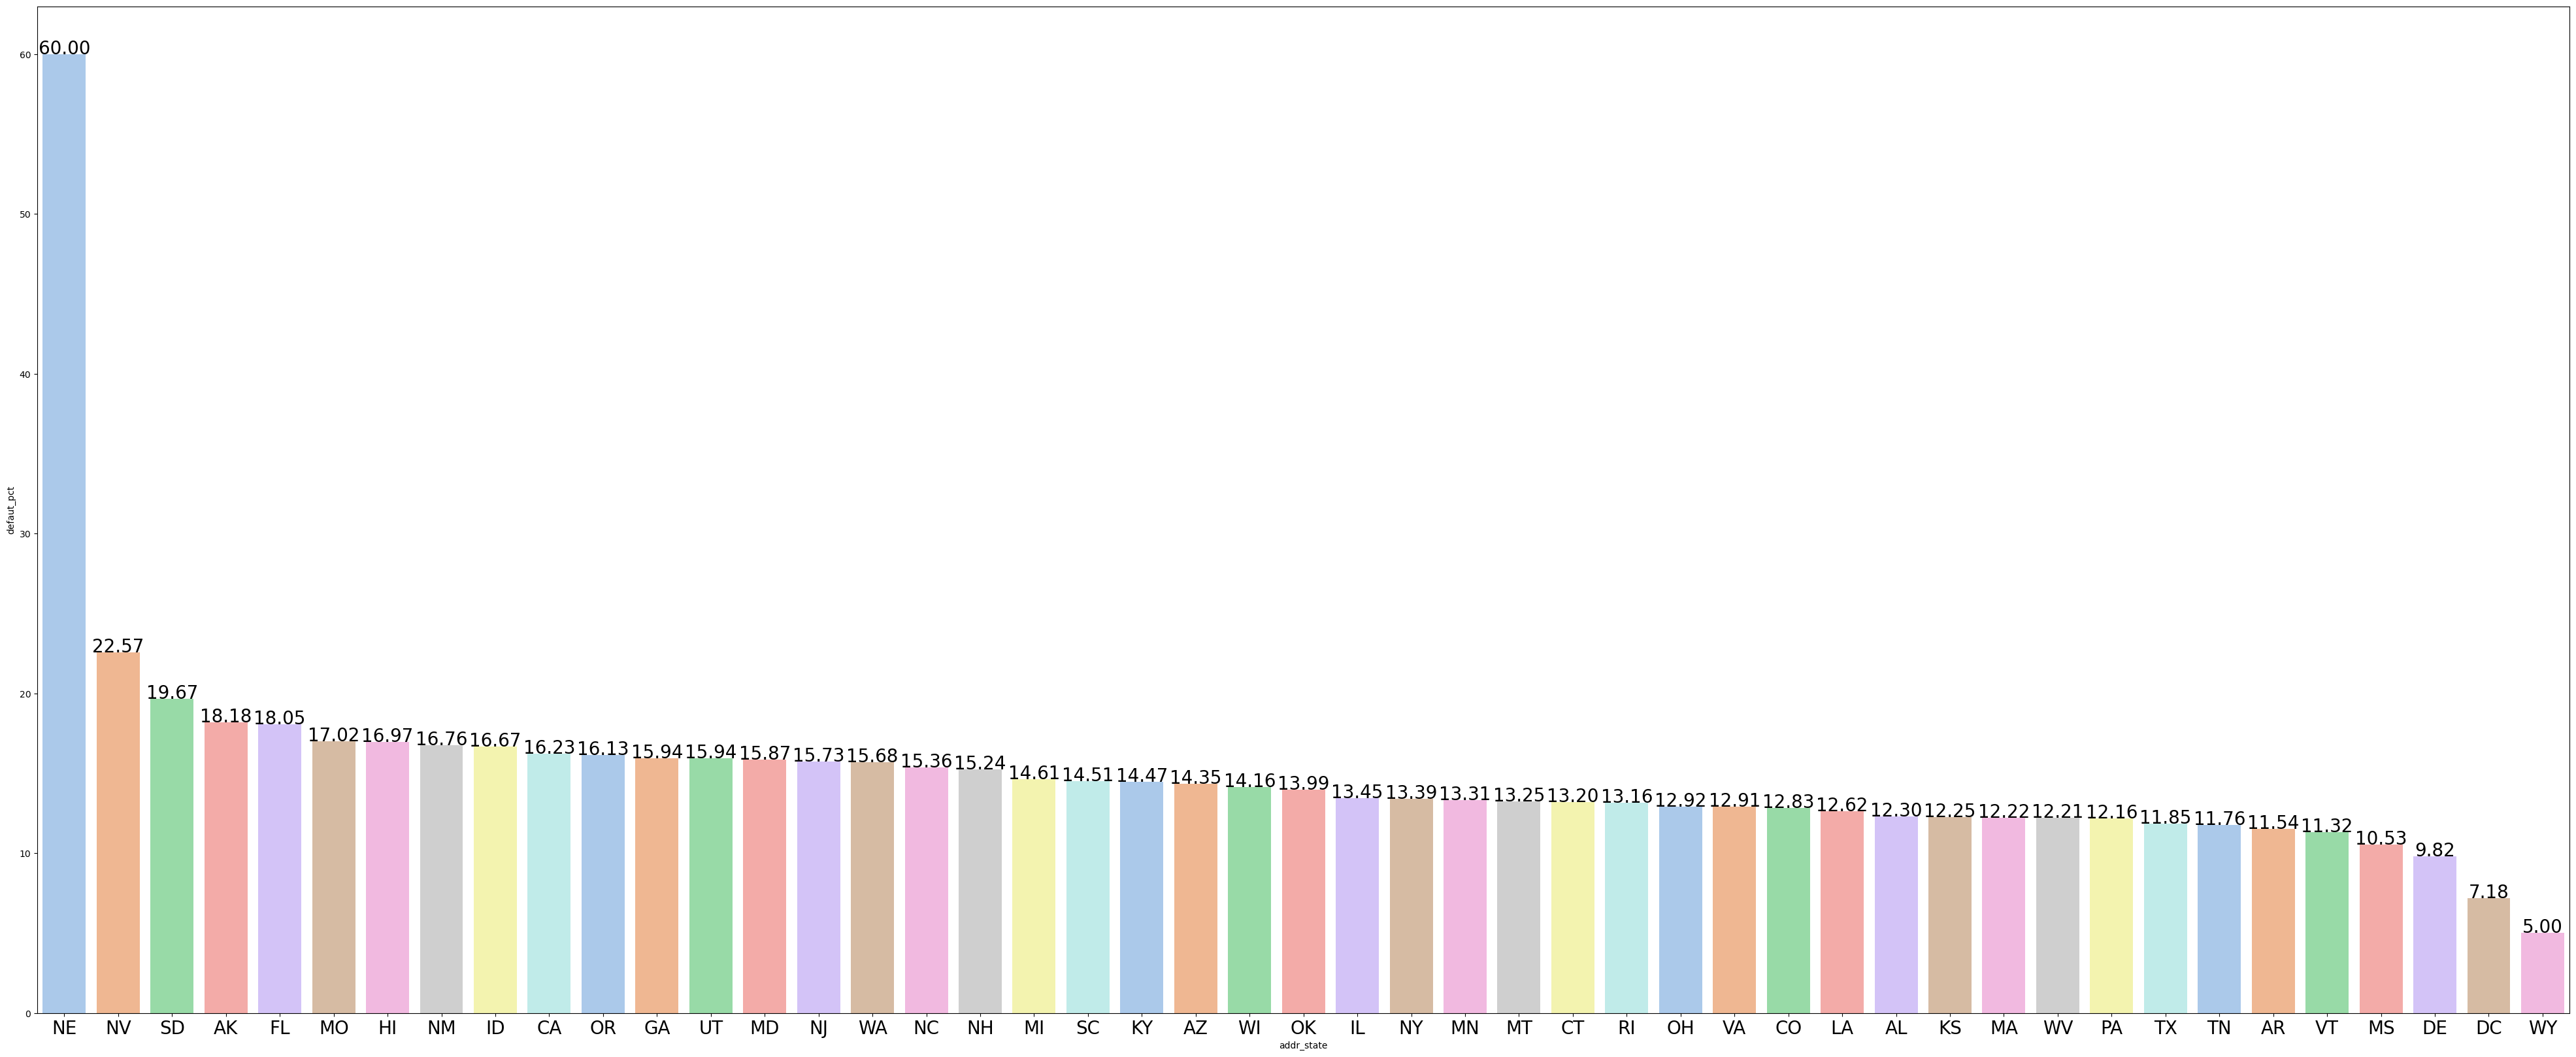

In [35]:
# Summary: This code analyzes loan data based on the borrower's state address, specifically focusing on 'Charged Off' and 'Fully Paid' loans.
# It calculates the default percentage for each state and visualizes the results using a bar plot with enhanced annotations.

DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('addr_state').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('addr_state').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)

merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='addr_state')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100

merged_df = merged_df.sort_values('defaut_pct',ascending=False)


plt.figure(figsize=(50,20))
plots =sns.barplot(data =merged_df,x='addr_state', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=20, xytext=(0, 6),
                   textcoords='offset points')

plt.xticks(rotation=360, fontsize=20)
plt.show()

**Home Ownership:** 
- We can observe that borrowers who have ownership categorized as Rent or Mortgage have a higher number of defaults, although this count is lower than those classified as 'Other.'
- This suggests the need for improved loan categorization for more precise analysis.


  home_ownership  Charged Count  Paid Count  defaut_pct
1       MORTGAGE           2298       14437   13.731700
2            OWN            438        2503   14.892894
0           RENT           2814       15551   15.322625
3          OTHER             18          76   19.148936


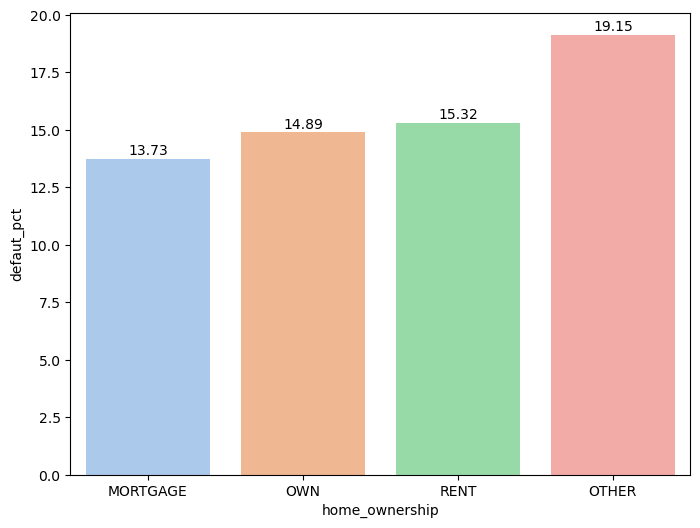

In [36]:
# Summary: This code analyzes loan data to calculate the default percentage based on 'home_ownership'
# for 'Charged Off' and 'Fully Paid' loans, and visualizes the results using a bar plot.

DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('home_ownership').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('home_ownership').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)


merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='home_ownership')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100

merged_df = merged_df.sort_values('defaut_pct')
print(merged_df)

plt.figure(figsize=(8,6))
plots = sns.barplot(data =merged_df,x='home_ownership', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')

plt.show()

**Loan Grades**
- When we take a closer look at the data, it becomes apparent that loans categorized under Grade G exhibit the highest number of default cases.
- In contrast, loans classified as Grade A demonstrate the lowest instances of defaults


  grade  Charged Count  Paid Count  defaut_pct
4     A            601        9375    6.024459
0     B           1414       10161   12.215983
1     C           1338        6400   17.291290
2     D           1109        3903   22.126895
3     E            700        1899   26.933436
5     F            309         639   32.594937
6     G             97         190   33.797909


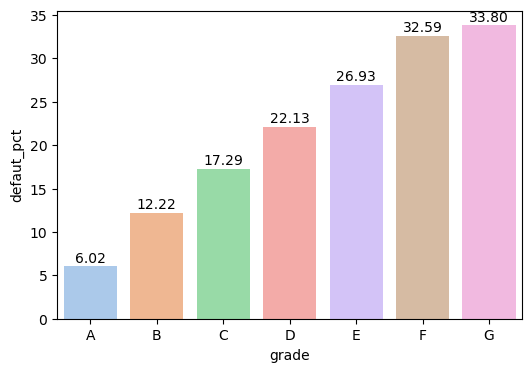

In [37]:
# Summary: This code analyzes loan data, specifically focusing on 'Charged Off' and 'Fully Paid' loans,
# to calculate the default percentage for different loan grades and visualize the results using a bar plot.
DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('grade').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('grade').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)

merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='grade')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100

merged_df = merged_df.sort_values('defaut_pct')
print(merged_df)

plt.figure(figsize=(6,4))
plots = sns.barplot(data =merged_df,x='grade', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
plt.show()

**Interest Rates and Loan Amounts**
- We can observed that Borrowers who have taken larger loan amounts and the highest interest rates experience the highest rate of defaults. 
- As the loan amount or interest rate increases, the default ratio also increases


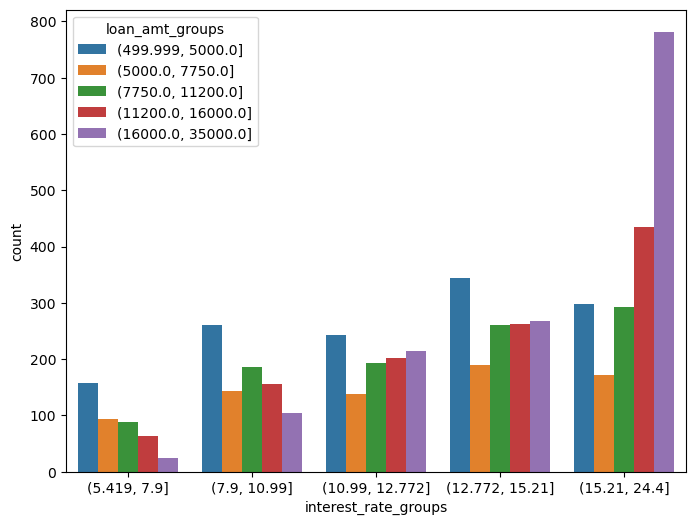

In [38]:
# Summary: This code creates a countplot to visualize the relationship between 'interest_rate_groups' and 'loan_amt_groups'
# for 'Charged Off' loans in the DataFrame Df_loan. The plot helps identify patterns in loan defaults based on interest rates
# and loan amounts.
plt.figure(figsize=(8,6))
sns.countplot(x = 'interest_rate_groups', hue = 'loan_amt_groups',data = Df_loan[Df_loan.loan_status == 'Charged Off'])
plt.show()

**Annual Income and Purpose**

Loans associated with specific purposes, namely Small Business, Renewable Energy, and Education, tend to have the highest default rates. Additionally, when examining the relationship between income and loan purposes:

- Small Business Loans for individuals with an income ranging from 0-65K exhibit a higher prevalence of defaults.

- Education and Medical loans for those with an income ranging from 65-87K also display an elevated default rate.

- House loans are more prone to defaults among individuals with an income between 4-37K.

               purpose  Charged Count  Paid Count  defaut_pct
3       small_business            472        1250   27.409988
13    renewable_energy             19          81   19.000000
11         educational             55         265   17.187500
1                other            625        3191   16.378407
10               house             58         299   16.246499
9               moving             91         477   16.021127
7              medical            105         567   15.625000
0   debt_consolidation           2747       15155   15.344654
12            vacation             53         321   14.171123
4     home_improvement            335        2457   11.998567
2          credit_card            536        4448   10.754414
6                  car            159        1330   10.678308
5       major_purchase            219        1905   10.310734
8              wedding             94         821   10.273224


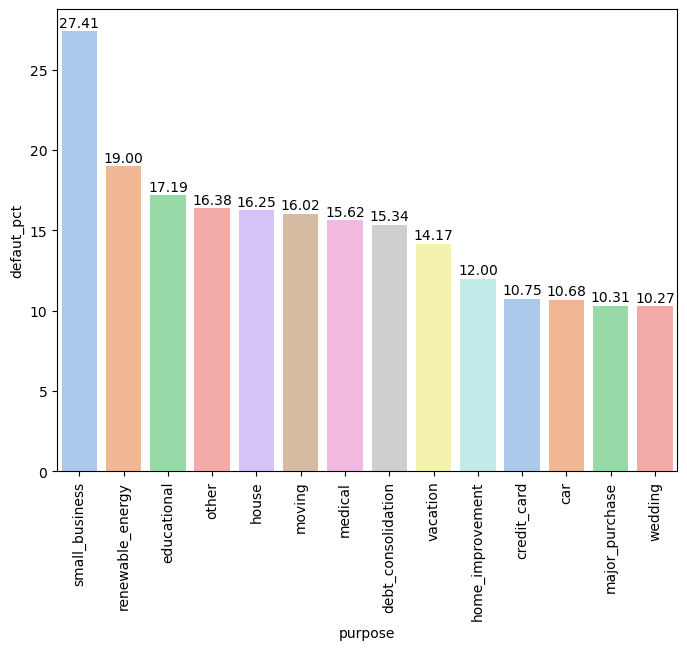

In [39]:
# Summary: This code analyzes loan data, specifically focusing on 'Charged Off' and 'Fully Paid' loans,
# to calculate the default percentage for different loan purposes and visualize the results using a bar plot.
DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('purpose').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('purpose').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)


merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='purpose')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100

merged_df = merged_df.sort_values('defaut_pct',ascending=False)
print(merged_df)

plt.figure(figsize=(8,6))
plots = sns.barplot(data =merged_df,x='purpose', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:
   

    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')

plt.xticks(rotation=90)
plt.show()

**Seasonal Trends**
- We've observed that the months of December and May consistently exhibit the highest default rates.
- It's worth noting that December, characterized by the Christmas holidays, stands out with particularly elevated default numbers


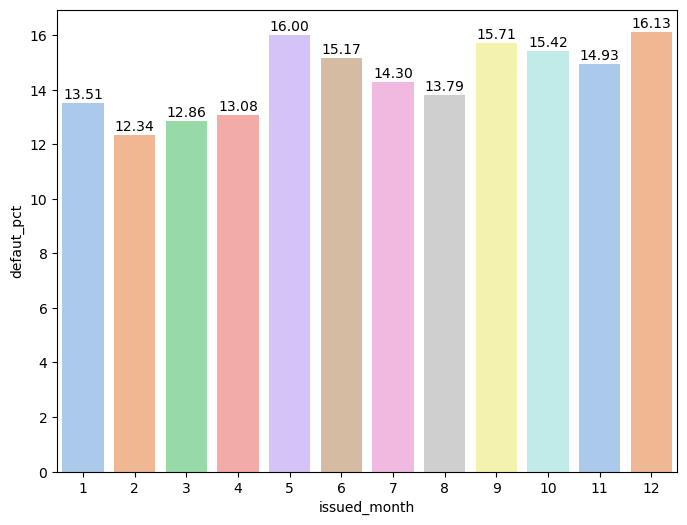

In [40]:
# Summary: This code analyzes loan data, focusing on 'Charged Off' and 'Fully Paid' loans,
# and calculates the default percentage for different issued months. The results are visualized
# using a bar plot to understand the default rates over time.

DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('issued_month').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('issued_month').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)


merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='issued_month')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100

merged_df = merged_df.sort_values('defaut_pct')


plt.figure(figsize=(8,6))
plots = sns.barplot(data =merged_df,x='issued_month', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')

plt.xticks(rotation=360)
plt.show()

**Revolving Line Utilization on Loan** 
- Higher utilization of revolving lines of credit corresponds to an increase in loan defaults


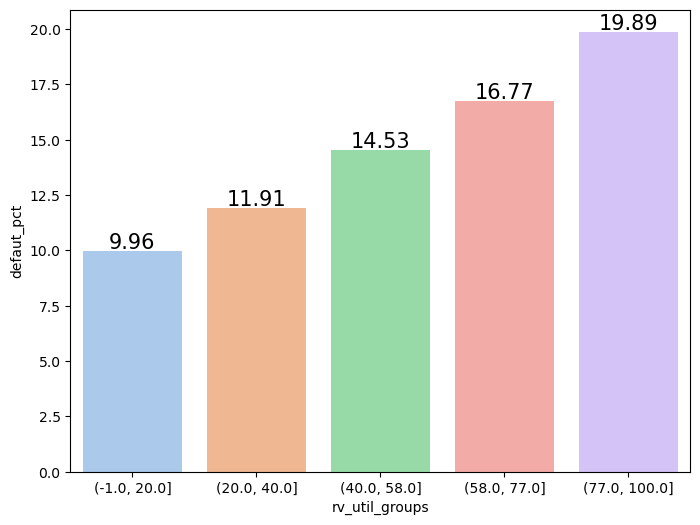

In [41]:
# Summary: This code analyzes loan data, specifically focusing on 'Charged Off' and 'Fully Paid' loans,
# based on different utilization rate groups ('rv_util_groups'). It calculates the default percentage
# for each utilization rate group and visualizes the results using a bar plot.


DF_loanAmt_chargedOff= Df_loan[Df_loan.loan_status == 'Charged Off'].groupby('rv_util_groups').size().reset_index(name='Charged Count').sort_values(by='Charged Count', ascending=False)
DF_loanAmt_fullyPaid= Df_loan[Df_loan.loan_status == 'Fully Paid'].groupby('rv_util_groups').size().reset_index(name='Paid Count').sort_values(by='Paid Count', ascending=False)

merged_df = pd.merge(DF_loanAmt_chargedOff, DF_loanAmt_fullyPaid, on='rv_util_groups')
merged_df["defaut_pct"] =(merged_df["Charged Count"]/(merged_df["Charged Count"]+merged_df["Paid Count"]))*100
merged_df = merged_df.sort_values('defaut_pct')


plt.figure(figsize=(8,6))
plots = sns.barplot(data =merged_df,x='rv_util_groups', y='defaut_pct',palette="pastel")

# Iterating over the bars one-by-one
for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 6),
                   textcoords='offset points')

plt.show()

## Correlation Analysis
- we perform a correlation analysis to understand the relationships between different parameters in our dataset.
- We visualize the correlations using a clustermap, which helps identify patterns and clusters of related variables

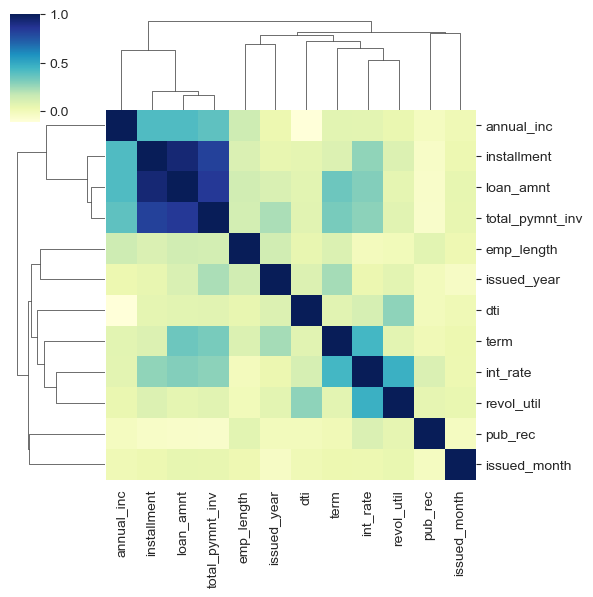

In [42]:
# Summary: This code generates a clustermap to visualize the correlation between different parameters
# in the 'Df_loan' DataFrame, helping to identify patterns and relationships among the variables.
sns.set_style("whitegrid")
sns.clustermap(data=Df_loan.corr(numeric_only=True), cmap='YlGnBu', figsize=(6, 6))
plt.show()

## Bivariate Analysis ##

**State vs Purpose**

- We can clearly observe that vacations in AK, IA, and WA with house purposes have the highest default rates.



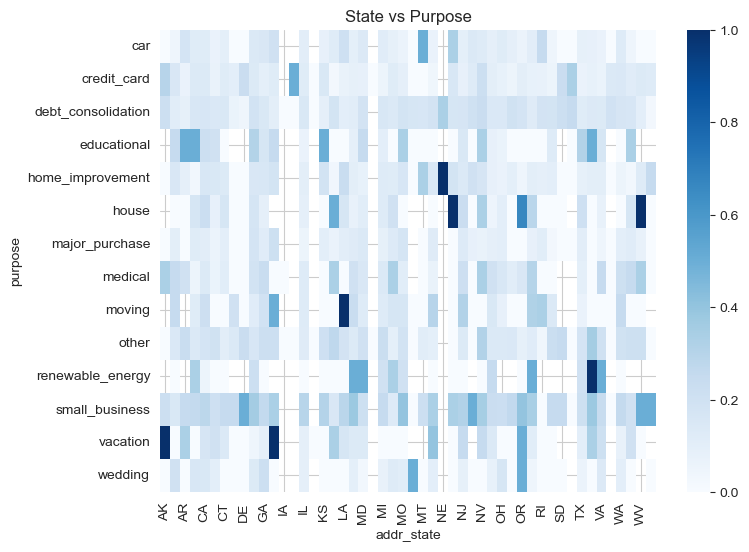

In [43]:
# Summary: This code creates a heatmap visualization to explore the relationship between loan status ('Charged Off' or 'Fully Paid'),
# loan purposes, and borrower address states. It calculates the loan_status_index for each loan, creates a pivot table,
# and uses seaborn to generate the heatmap for better data analysis and visualization.

Df_loan['loan_status_index'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
fig, ax = plt.subplots(figsize=(8,6))
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='purpose', columns='addr_state')

sns.heatmap(pivot_table, annot=False, cmap='Blues', fmt=".2f")
plt.title('State vs Purpose')
plt.show()

**Annual Income vs Purpose**: 
- Loans associated with specific purposes, namely Small Business, Renewable Energy, and Education, tend to have the highest default rates. 
- Additionally, when examining the relationship between income and loan purposes:
- Small Business Loans for individuals with an income ranging from 0-65K exhibit a higher prevalence of defaults
- Education and Medical loans for those with an income ranging from 65-87K also display an elevated default rate
- House loans are more prone to defaults among individuals with an income between 4-37K



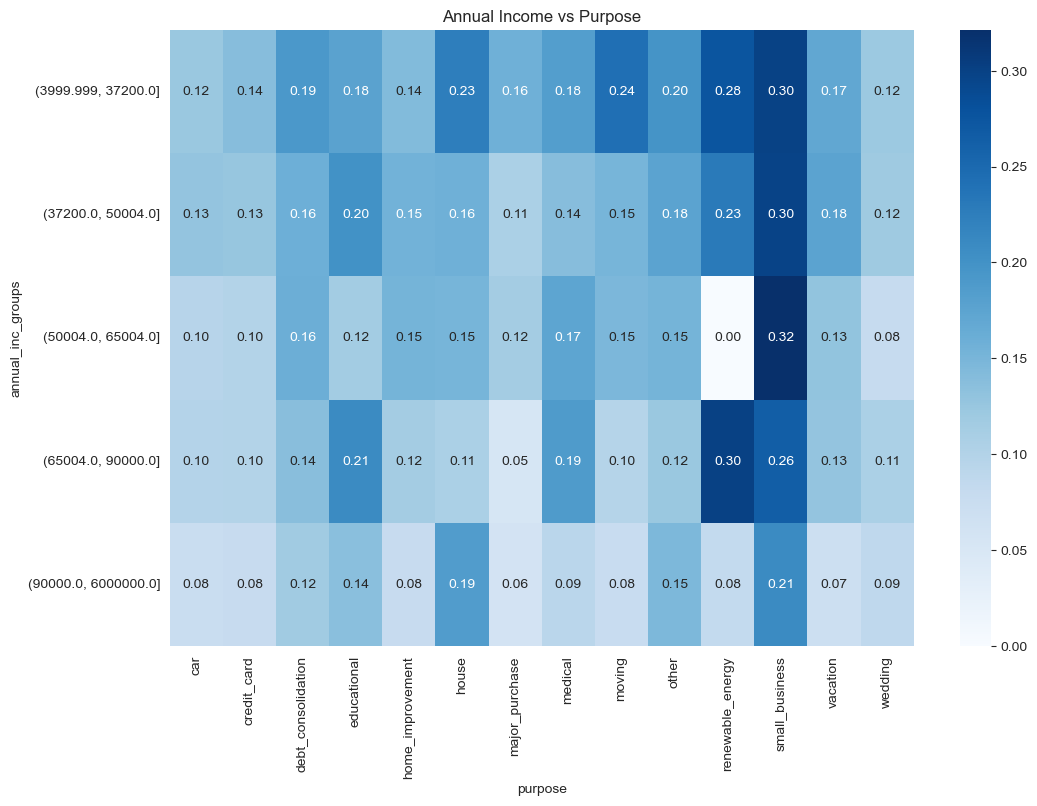

In [44]:
# Summary: This code creates a heatmap visualization to analyze the relationship between annual income,
# loan purpose, and loan status by constructing a pivot table and using seaborn's heatmap function.
# It annotates the heatmap cells with numerical values, applies a blue color map, and rotates the axis labels
# for better readability. The resulting heatmap helps visualize patterns and trends in the data.


fig, ax = plt.subplots(figsize=(12, 8))
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='annual_inc_groups', columns='purpose')

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")

# Rotate the x and y axis labels
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.title('Annual Income vs Purpose')
plt.show()

**Annual Income vs State**: When examining the combination of income and state:
- The state of Mississippi (MS) experiences a higher number of defaults within the income range of 50-65K.
- Idaho (ID) and Nebraska (NE) show a higher prevalence of defaults within the income range of 4-37K.
- Texas (TX) exhibits a higher occurrence of defaults within the income range of 37-50K


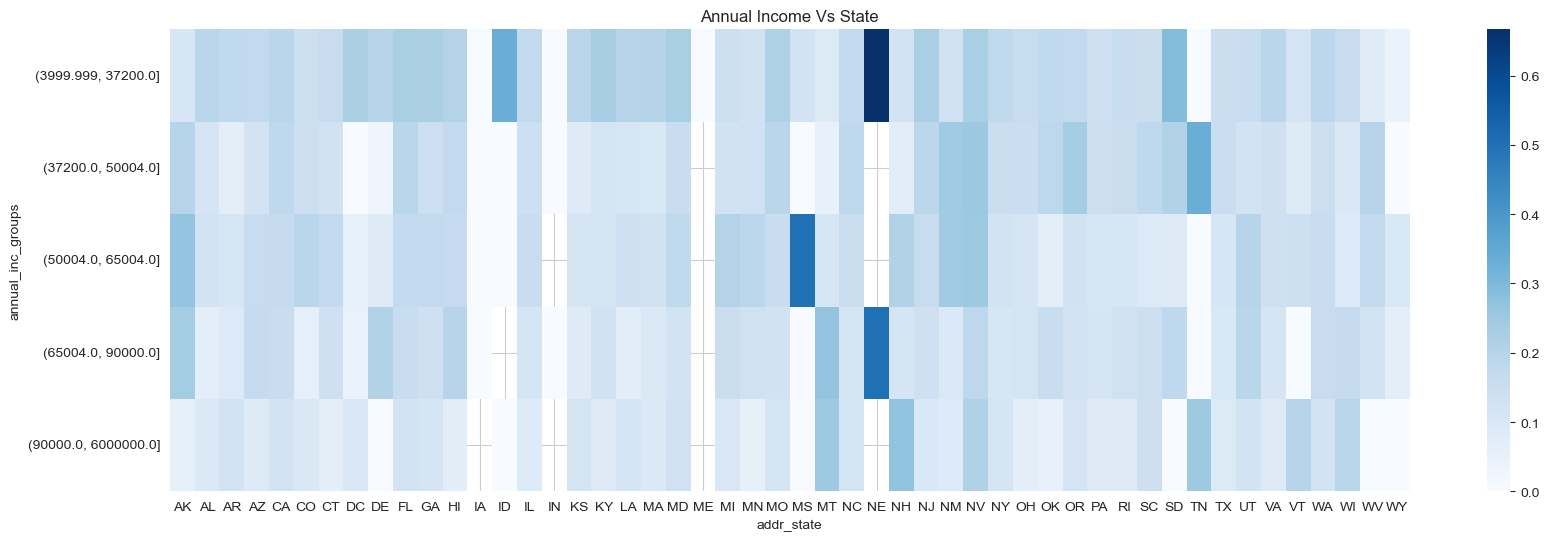

In [45]:
# Summary: This code creates a heatmap visualization to explore the relationship between annual income,
# state of residence, and loan status index using a pivot table from the provided loan data.
# It helps visualize how annual income and state correlate with loan status.

fig, ax = plt.subplots(figsize=(20,6))

pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='annual_inc_groups', columns='addr_state')

sns.heatmap(pivot_table, annot=False, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Annual Income Vs State')
plt.xticks(rotation=360)
plt.yticks(rotation=0)
plt.show()

**Installment vs. Annual Income** 
- When analyzing the relationship between installment payments and annual income, we observe a clear trend: as annual income increases, the default ratio decreases. 
- This phenomenon suggests that individuals with higher incomes have a greater capacity and affordability to take out loans and successfully repay them


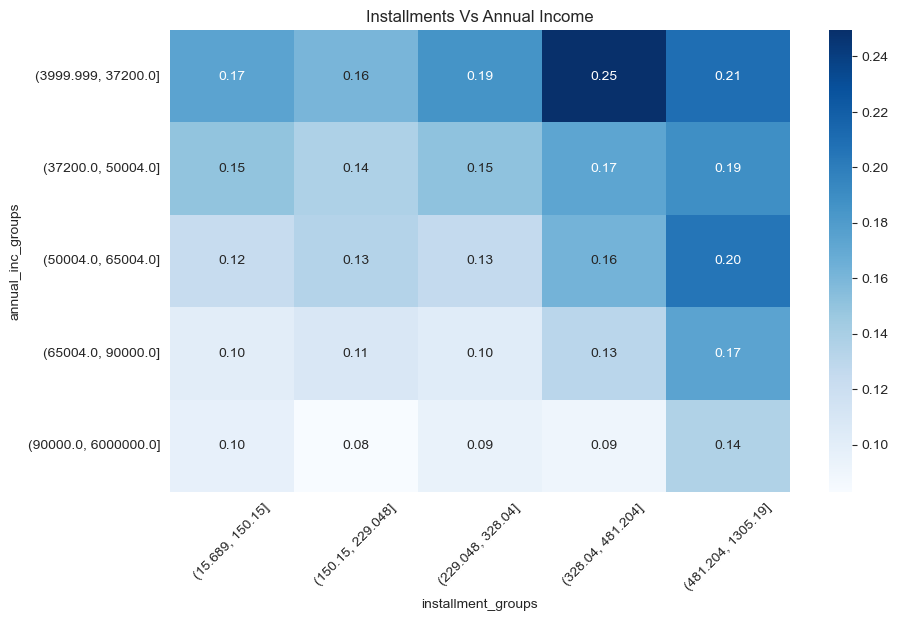

In [46]:
# Summary: This code creates a heatmap to visualize the relationship between annual income groups, installment groups,
# and loan status using a pivot table of loan data. The heatmap helps identify patterns and trends in loan status based
# on the annual income and installment groups.

fig, ax = plt.subplots(figsize=(10,6))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='annual_inc_groups', columns='installment_groups')

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Installments Vs Annual Income')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

**Installments vs Annual Income**
- When analyzing the relationship between installment payments and annual income, we observe a clear trend: as annual income increases, the default ratio decreases. 
- This phenomenon suggests that individuals with higher incomes have a greater capacity and affordability to take out loans and successfully repay them


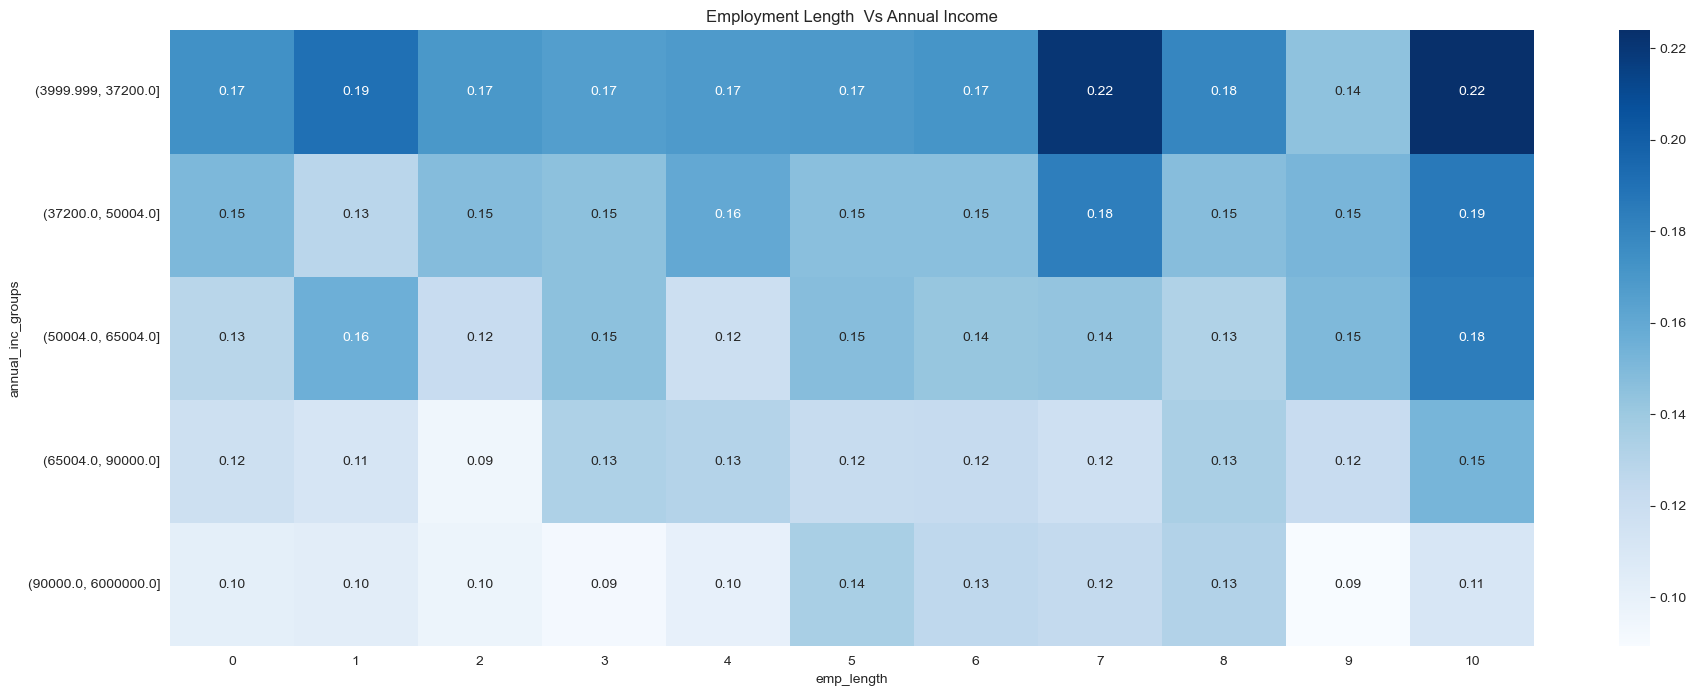

In [47]:
# Summary: This code creates a heatmap to visualize the relationship between 'annual_inc_groups' (annual income groups)
# and 'emp_length' (employment length) in the loan dataset. It uses a pivot table to aggregate and display the data,
# and annotates the heatmap with numeric values. The colormap used is 'Blues', and the title of the plot is set to
# 'Installments Vs Annual Income'.

fig, ax = plt.subplots(figsize=(22,8))

pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='annual_inc_groups', columns='emp_length')



sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")

plt.title('Employment Length  Vs Annual Income')
plt.show()


**Interest Rate vs Employment Length**

- We can see that interest rates between 15-24% with employment length 10+ years have the highest number of defaults.


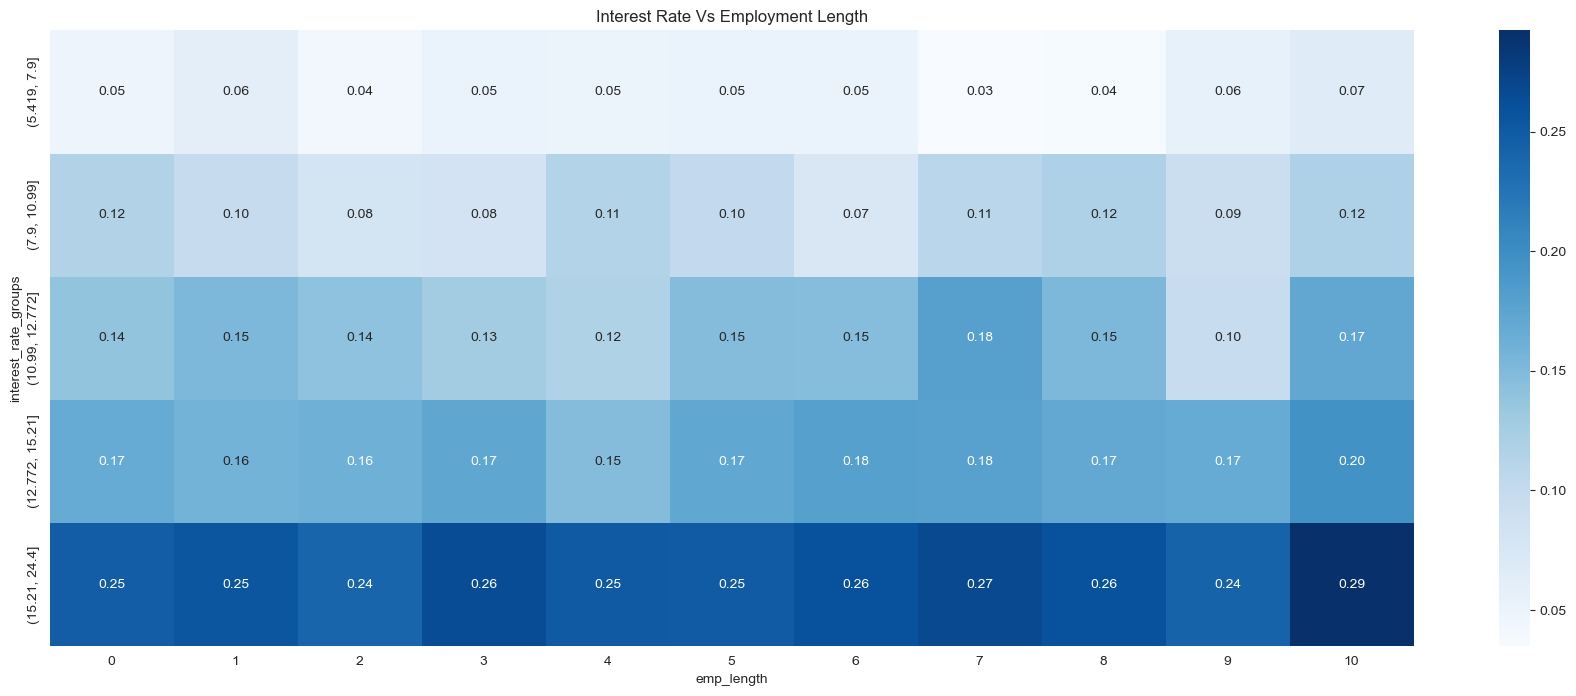

In [48]:
# Summary: This code creates a heatmap to visualize the relationship between interest rates,
# employment length, and loan status by utilizing a pivot table and the Seaborn library.
# It provides insights into how interest rates are distributed across different employment lengths.

fig, ax = plt.subplots(figsize=(22,8))

pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='interest_rate_groups', columns='emp_length')

 

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")

plt.title('Interest Rate Vs Employment Length')
plt.show()

**Home Ownership vs Purpose**

- It's evident that homes with "other" ownership and purposes related to "moving" have the highest number of defaults.


home_ownership      MORTGAGE     OTHER       OWN      RENT
purpose                                                   
car                 0.096552  0.500000  0.100671  0.119086
credit_card         0.104683  0.181818  0.128472  0.107300
debt_consolidation  0.153930  0.179487  0.153846  0.152895
educational         0.134831  0.000000  0.250000  0.182692
home_improvement    0.115315  0.200000  0.130990  0.145669
house               0.146154  0.000000  0.093750  0.185567
major_purchase      0.083149  0.000000  0.108696  0.120690
medical             0.145833  0.000000  0.153846  0.167722
moving              0.074766  1.000000  0.222222  0.175520
other               0.134155  0.166667  0.162983  0.183713
renewable_energy    0.166667       NaN  0.100000  0.250000
small_business      0.243119  0.400000  0.343137  0.299458
vacation            0.097015       NaN  0.137931  0.170616
wedding             0.119134  0.000000  0.056604  0.099315


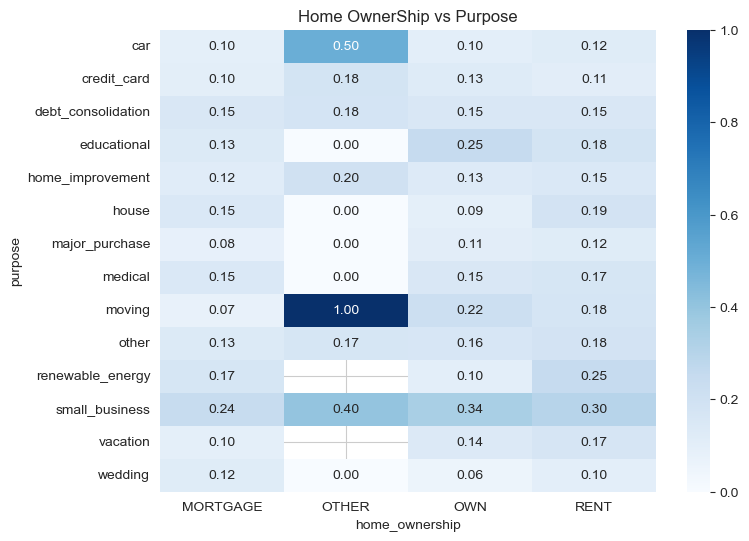

In [49]:
# Summary: This code calculates and visualizes the relationship between home ownership status,
# loan purpose, and loan default rates using a pivot table and a heatmap.
# Add a binary column 'loan_status_index' to Df_loan: 1 for 'Charged Off' loans, 0 otherwise

Df_loan['loan_status_index'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
fig, ax = plt.subplots(figsize=(8,6))

pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='purpose', columns='home_ownership')

 

print(pivot_table)
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")

plt.title('Home OwnerShip vs Purpose')
plt.show()

**Term Vs Employment Length**

- This analysis clearly indicates that loans with a term of 60 months and an employment length of 10+ years have the highest number of defaults.


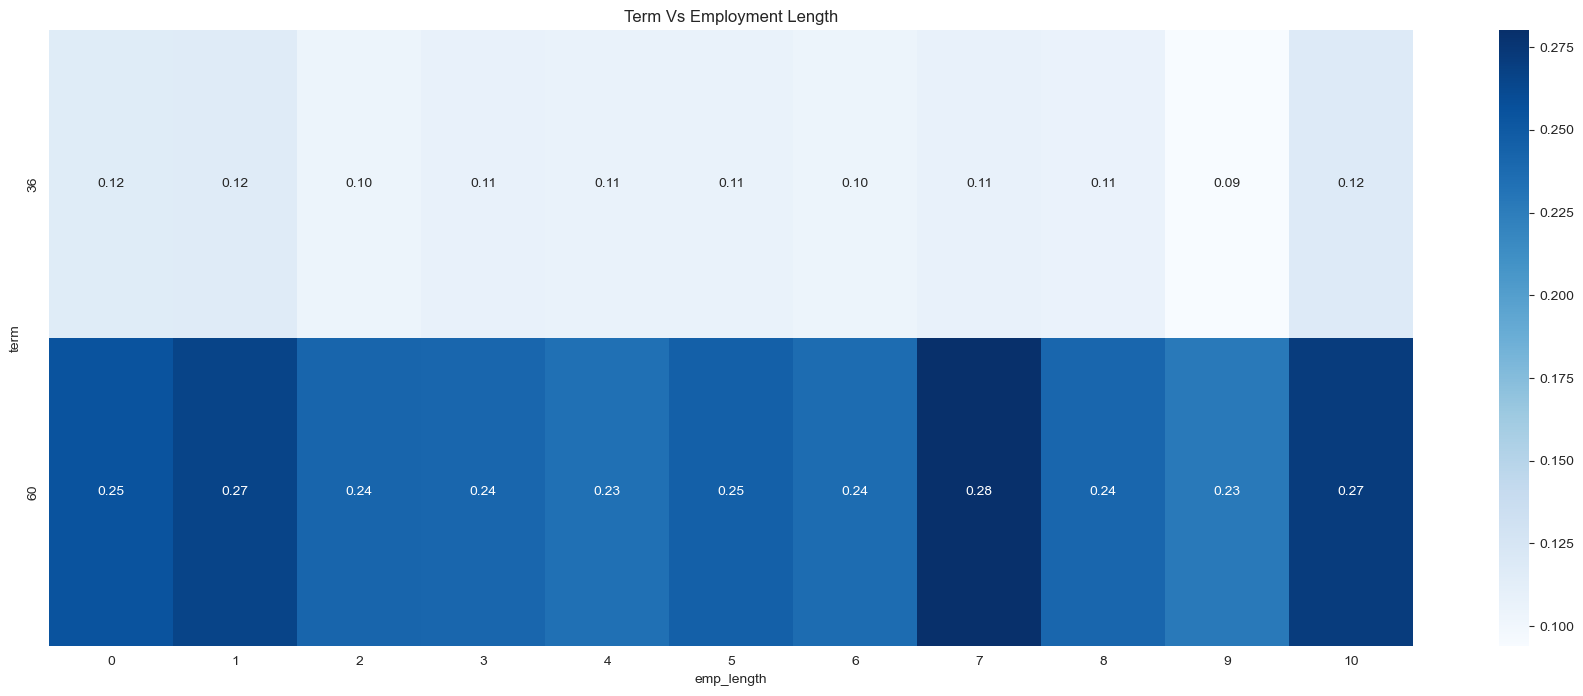

In [50]:
# Summary: This code generates a heatmap to visualize the relationship between loan term, employment length,
# and a numerical value represented by 'loan_status_index' using a pivot table and the Seaborn library.
fig, ax = plt.subplots(figsize=(22,8))

pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='term', columns='emp_length')

 

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")

plt.title('Term Vs Employment Length')
plt.show()

**Term Vs Annual Income**

- This analysis indicates that loans with a 60-month term have the highest number of defaults when annual income falls within the range of 40k.


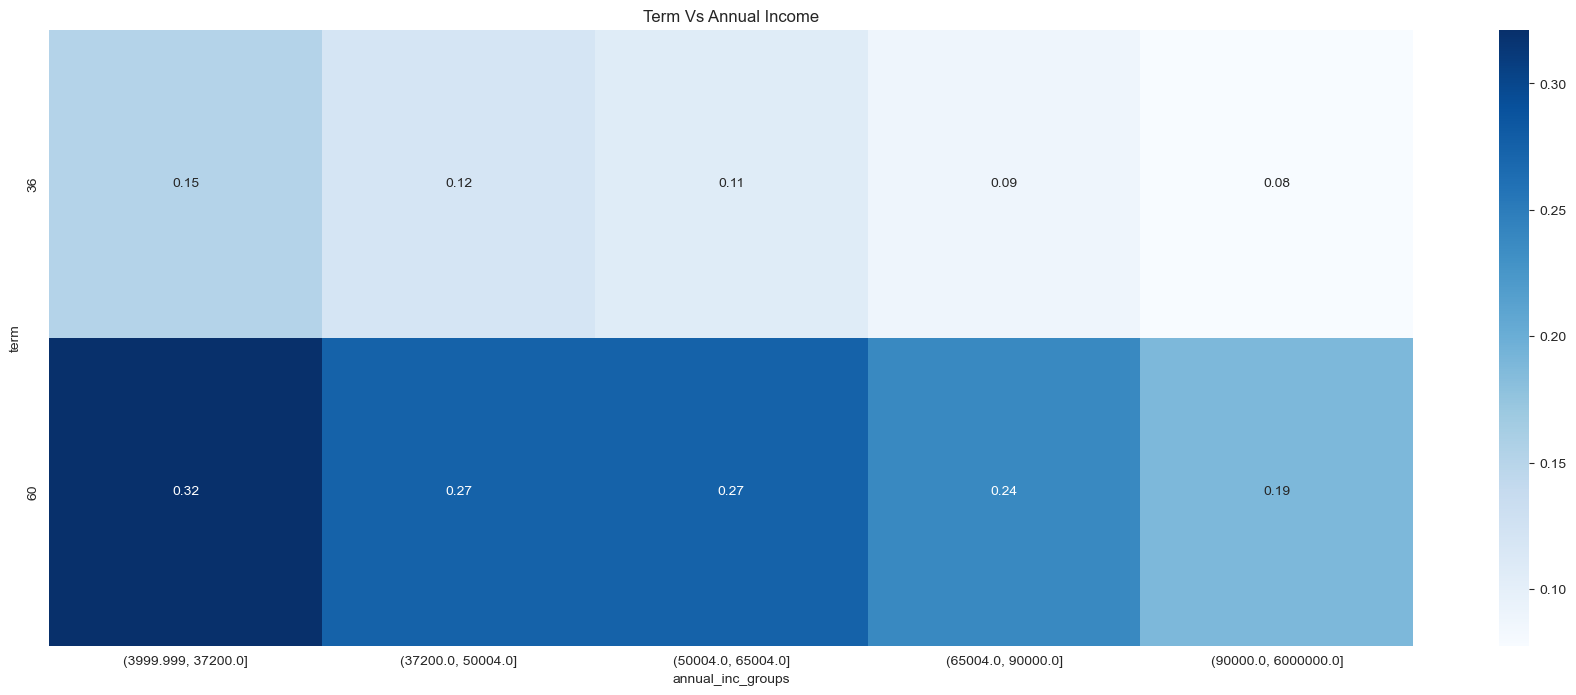

In [51]:
# Summary: This code creates a heatmap to visualize the relationship between loan term (short-term or long-term)
# and annual income groups. It uses a pivot table to organize and summarize the data, and then displays the heatmap
# with annotations to highlight the patterns and insights in the data.

fig, ax = plt.subplots(figsize=(22,8))

pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='term', columns='annual_inc_groups')

 

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")

plt.title('Term Vs Annual Income')
plt.show()

**Grade Vs Annual Income**

It clearly indicates that the income of 40k and grade 'G' has the highest number of defaulters.


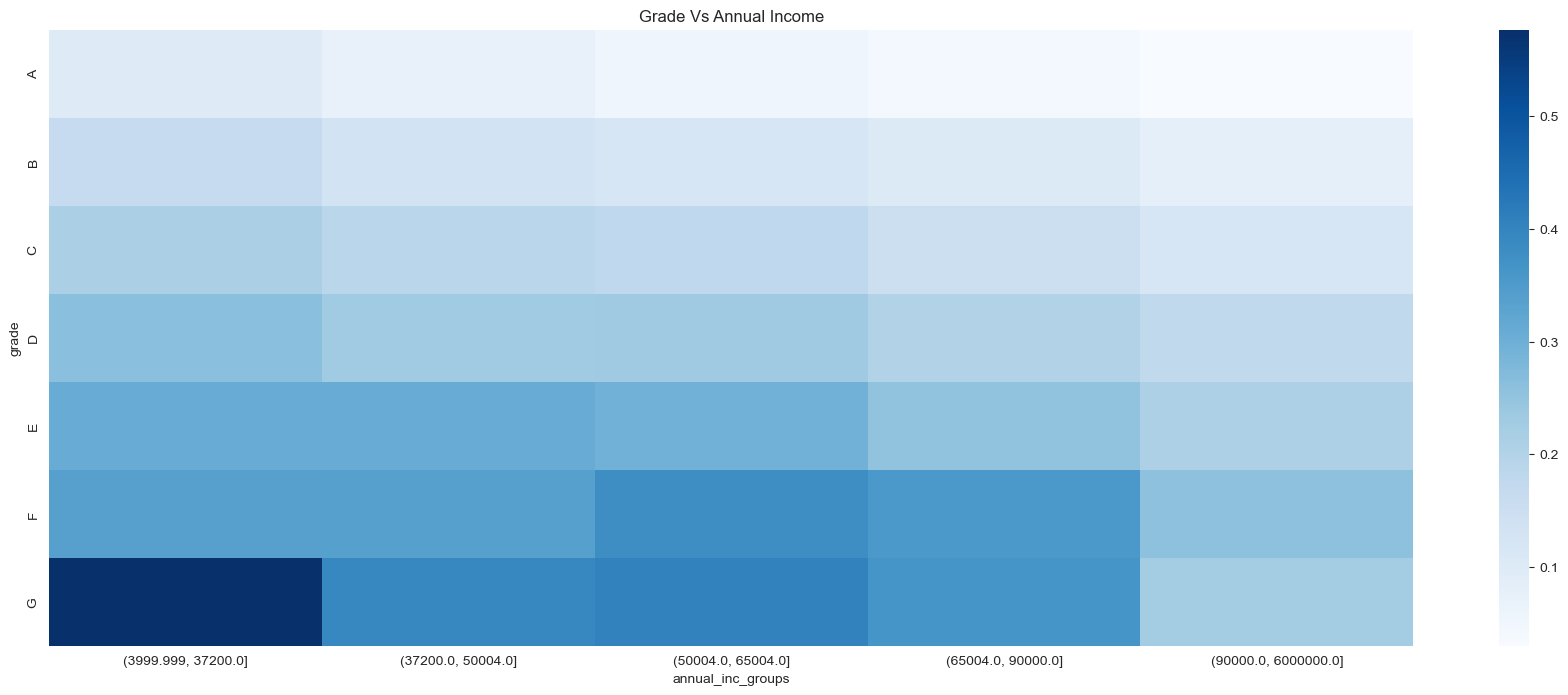

In [52]:
# Summary: This code creates a heatmap to visualize the relationship between loan grades ('grade') and annual income groups ('annual_inc_groups').
# It uses a pivot table to organize and display the data, with color intensity representing the values in the table.
# The heatmap provides insights into how loan grades correlate with different annual income levels.

fig, ax = plt.subplots(figsize=(22,8))

pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='grade', columns='annual_inc_groups')

 

sns.heatmap(pivot_table, annot=False, cmap='Blues', fmt=".2f")

plt.title('Grade Vs Annual Income')
plt.show()

**Loan Amount Vs Annual Income**

We observed that when the loan amount is between 16k to 35k and annual income is around 40k, borrowers tend to default the most. However, as income increases, the default ratio decreases.



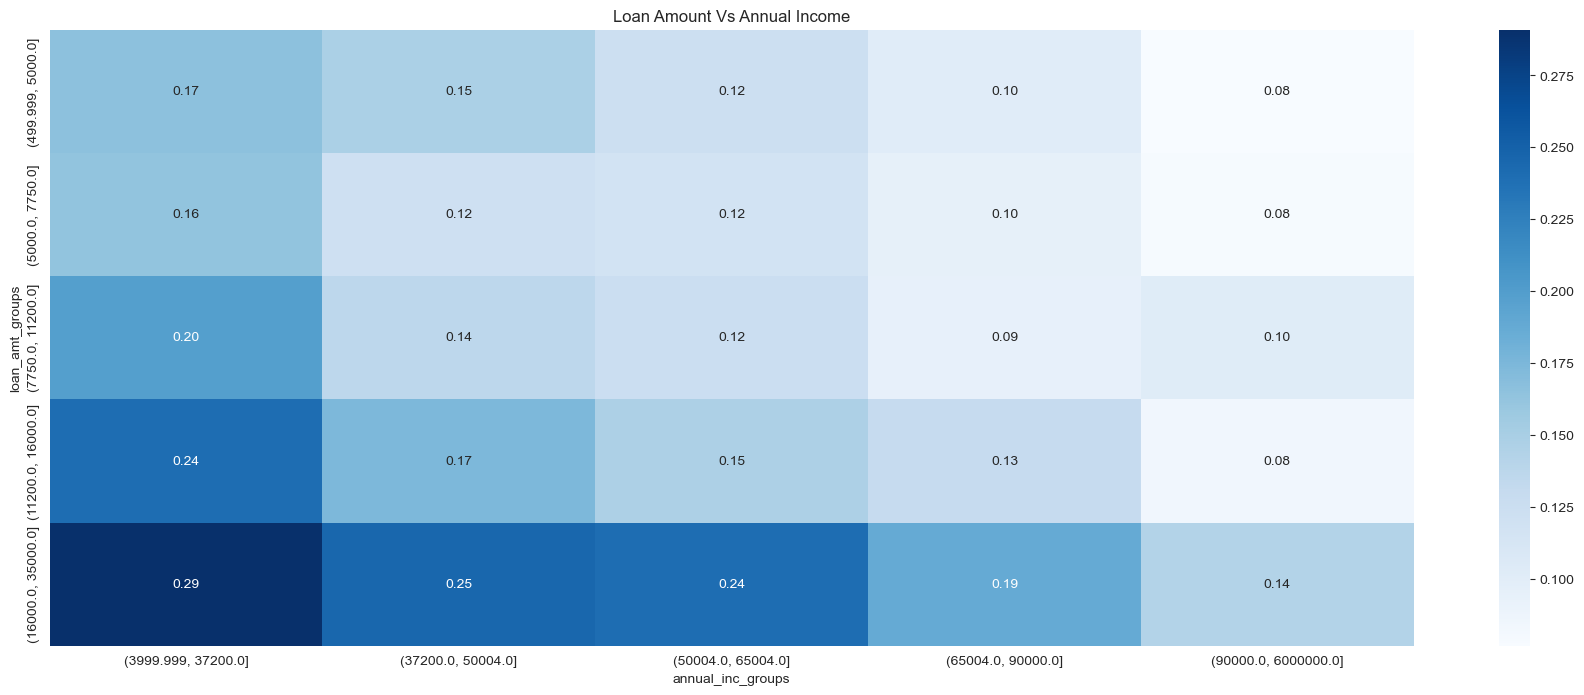

In [53]:
# Summary: This code creates a heatmap to visualize the relationship between loan amounts,
# annual income, and loan status index grouped by loan amount and annual income groups.
# It uses a pivot table to organize the data and annotates the heatmap with values.
# The resulting visualization provides insights into the distribution of loan status across
# different combinations of loan amounts and annual income.


fig, ax = plt.subplots(figsize=(22,8))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='loan_amt_groups', columns='annual_inc_groups')

 

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Loan Amount Vs Annual Income')
plt.show()

**Employment Length vs Annual Income**

- We can observe that when annual income is between 40k, employment length between 7 and 10 years has the highest default rate. However, as income increases, the default rate tends to decrease.


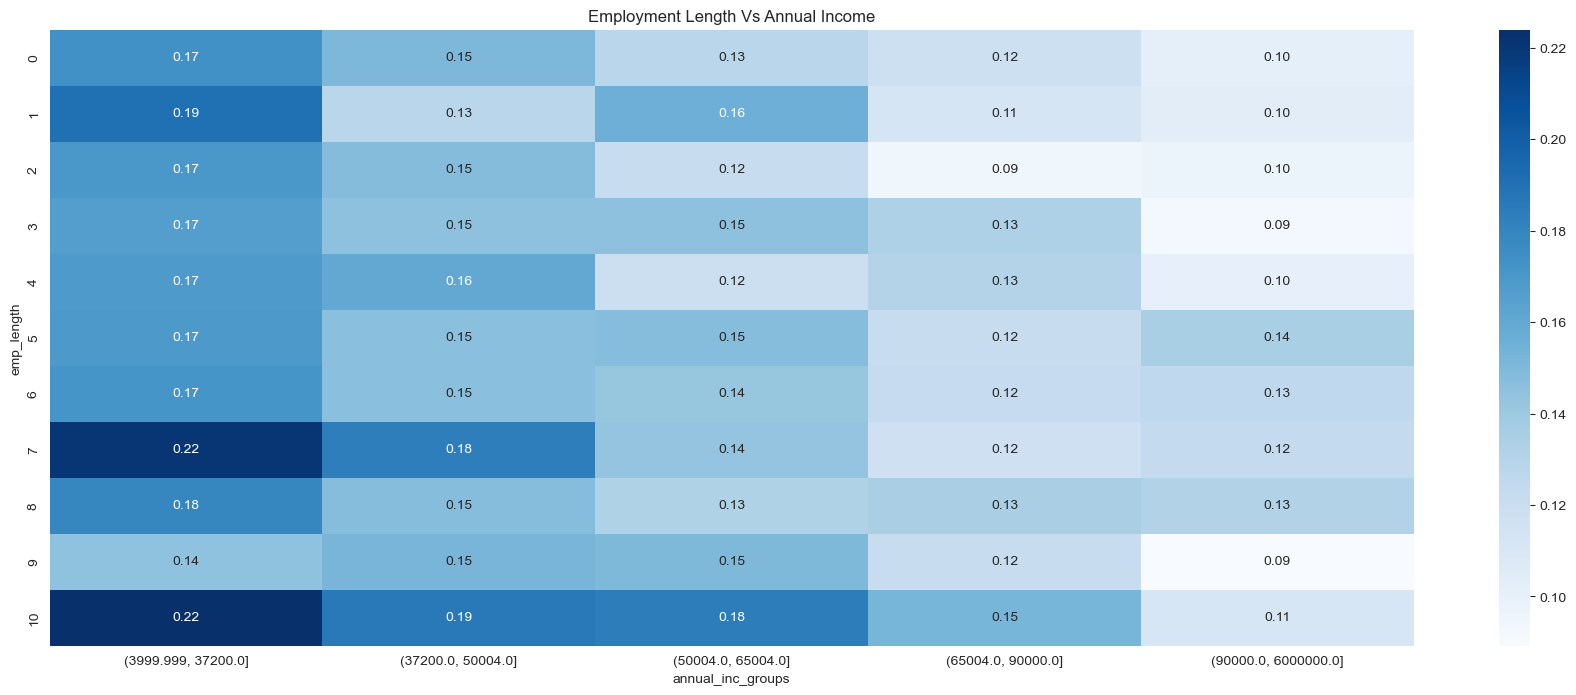

In [54]:
# Summary: This code creates a heatmap visualization to explore the relationship between employment length (emp_length),
# annual income groups (annual_inc_groups), and loan status index (loan_status_index) using a pivot table.
# The heatmap displays the correlation between these variables, with annotations and a blue color map for clarity.

fig, ax = plt.subplots(figsize=(22,8))
#pt = pd.pivot_table(data=Df_loan, values='loan_status', index='purpose', columns='home_ownership')
pivot_table = pd.pivot_table(Df_loan, values='loan_status_index', index='emp_length', columns='annual_inc_groups')

 

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")
#sns.heatmap(pivot_table, ax=ax)
plt.title('Employment Length Vs Annual Income')
plt.show()

<details>
  <summary>Conclusion</summary>
  
  The goal of our classification task is to identify whether a customer (who is requesting a loan) will be able to repay the loan in a timely manner, and for that, there are some attributes that can be used to affirm the same:
 
   **Factors Leading to Loan Defaults**

  - **Loan Verification Process:** The verification process has scope for improvement since verified borrowers tend to default more. It's a key factor to consider when assessing the risk of loan default.

  - **State and Purpose Correlation:** State has a good correlation with the purpose of the loan, which can be another factor to consider. When approving loans, this combination can be taken into consideration as it may influence loan defaults.

  - **Higher Annual Income:** Borrowers with higher annual income tend to default less, suggesting that income level is a significant predictor of loan repayment.

  - **Interest Rate and Loan Amount:** Higher interest rates or higher loan amounts among low-income groups tend to have more defaults. This indicates that borrowers in the low-income group should be carefully evaluated when considering interest rates and loan amounts.

  - **Loan Grades:** Loan grades are another good factor to consider, especially among low-income groups. They can serve as an indicator of the borrower's creditworthiness.

  - **Employment Length and Annual Income Combination:** The combination of employment length and annual income is another factor to examine. If the employment length is higher but the annual income is less than the median, the default rate is higher. This could imply that their living expenses are significantly more, leading to more defaults.

  - **Borrower's Home Ownership:** Homeownership is also another important factor to understand borrowers' monthly expenses, which can influence the likelihood of defaults.

  </details>